#### Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation of 5 using Python. Interpret the results.

In [6]:
from scipy import stats

mean = 50
std_dev = 5
n = 50 # assuming sample size of 50
# Confidence interval 0.95 = 1 - 0.95 = 0.05 = alpha
lower, upper = stats.norm.interval(0.05,loc=mean,scale=std_dev/(n ** 0.5))

print(f'Population mean lies between {lower:.2f} and {upper:.2f} for confidence interval of 95%')
        

Population mean lies between 49.96 and 50.04 for confidence interval of 95%


#### Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20% brown. Use Python to perform the test with a significance level of 0.05.

H0:- The distribution of colors of M&Ms in a bag matches the expected distribution.

H1:- The distribution of colors od M&Ms in a bag does not matches the expected distribution.

In [7]:
import numpy as np
from scipy.stats import chisquare

In [8]:
# Let's assum the observed frequencies
observed = np.array([20,10,5,9,12,15])

In [9]:
expected = np.array([0.2, 0.2, 0.2, 0.1, 0.1, 0.2]) * sum(observed)

In [10]:
chi2, p_val = chisquare(observed,expected)

In [12]:
print(f'The chi-square test statistic: {chi2:.2f} and p-values is {p_val:.2f}')

The chi-square test statistic: 13.51 and p-values is 0.02


In [13]:
if p_val < 0.05:
    print('We reject the null hypothesis')
else:
    print('We failed to reject the null hypothesis')

We reject the null hypothesis


#### Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following data: 
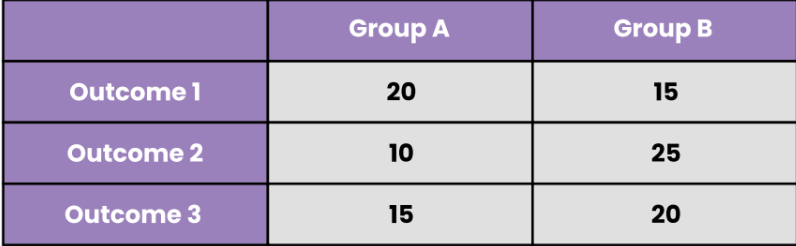

H0:- Outcomes are independent of the group

H1:- Outcomes are dependent on the group

In [14]:
import pandas as pd
from scipy.stats import chi2_contingency

In [20]:
observed = pd.DataFrame({
    'Group A': [20,10,15],
    'Group B': [15,25,20]
},index=['Outcome1','Outcome2','Outcome3'])
alpha = 0.05

In [21]:
observed

,Group A,Group B
Outcome1,20,15
Outcome2,10,25
Outcome3,15,20


In [19]:
chi2, p_val, dof, expected = chi2_contingency(observed)

In [24]:
print(f'Chi-square statstic: {chi2:.2f} and p-value is {p_val:.3f}')

Chi-square statstic: 5.83 and p-value is 0.054


In [26]:
if p_val < alpha:
    print('We reject the null hypothesis')
else:
    print('we failed to reject the null hypothesis.')

we failed to reject the null hypothesis.


#### Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the population who smoke.

In [1]:
import math
import scipy.stats as stat

In [2]:
# sample size
n = 500
x = 60

In [3]:
p = x/n

In [5]:
print(f'proportion of individuals in the population who smoke is {p}')

proportion of individuals in the population who smoke is 0.12


In [13]:
# let's find z-value for CI of 95%
alpha = 1 - 0.95
z_value = stat.norm.ppf(1-alpha/2)

In [15]:
print(f'Z-value for CI of 95% is  {z_value:.2f}')

Z-value for CI of 95% is  1.96


In [24]:
# Formula for CI is CI = p ± z*sqrt(p*(1-p)/n)
# standard error
se = math.sqrt((p*(1-p))/n)

In [27]:
print(f'The standard error of proportion is {se:.2f}')

The standard error of proportion is 0.01


In [33]:
lower_chi = (p - z_value * se) * 100
upper_chi = (p + z_value * se) * 100

In [34]:
print(f"the 95% confidence interval for the true proportion of individuals in the population who smoke is ({lower_chi:.2f},{upper_chi:.2f})")

the 95% confidence interval for the true proportion of individuals in the population who smoke is (9.15,14.85)


#### Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation of 12 using Python. Interpret the results.

In [35]:
import math
import scipy.stats as stat

In [36]:
x = 57
s = 12
n = 30 #Assuming the sample size is 30

In [39]:
alpha = 1 - 0.90
# degree of freedom
df = n-1

In [40]:
# lets find critical value for CI of 90%
t_value = stat.t.ppf(1-alpha/2,df)

In [44]:
print(f"The critical value is {t_value:.3f} for CI of 90%")

The critical value is 1.699 for CI of 90%


In [45]:
# lets calculate standard error of mean
std_mean = s / math.sqrt(n)

In [47]:
print(f"The standard error of mean is  {std_mean:.3f}")

The standard error of mean is  2.191


In [54]:
# Calculate the CI
lower_chi = x - t_value * std_mean
upper_chi = x + t_value * std_mean

In [55]:
print(f'Population mean lies between ({lower_chi},{upper_chi}) for CI of 90%')

Population mean lies between (53.2773991980037,60.7226008019963) for CI of 90%


#### Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the area corresponding to a chi-square statistic of 15.

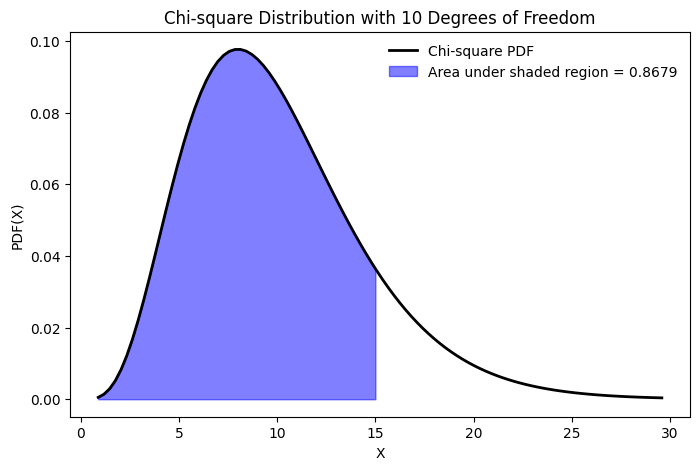

In [61]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set degrees of freedom
df = 10

# Define range of x-values for plotting
x = np.linspace(stats.chi2.ppf(0.0001, df), stats.chi2.ppf(0.999, df), 100)

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot chi-square distribution
ax.plot(x, stats.chi2.pdf(x, df), 'k-', lw=2, label='Chi-square PDF')

# Calculating area under curve 
area = stats.chi2.cdf(15,df)

# Shade area under the curve
x_fill = np.linspace(stats.chi2.ppf(0.0001, df), 15, 100)
ax.fill_between(x_fill, stats.chi2.pdf(x_fill, df), color='blue', alpha=0.5,label = f'Area under shaded region = {area:.4f}')

# Add legend and labels
ax.legend(loc='best', frameon=False)
ax.set_xlabel('X')
ax.set_ylabel('PDF(X)')
ax.set_title('Chi-square Distribution with 10 Degrees of Freedom')

plt.show()

#### Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520 preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who prefer Coke.

In [63]:
from scipy.stats import norm
import math

In [65]:
x = 520
n = 1000
p = x/n

In [66]:
z = norm.ppf(0.99)

In [67]:
z

2.3263478740408408

In [68]:
# standard error
se = z*math.sqrt(p*(1-p)/n)

In [69]:
se

0.03675335154773185

In [70]:
lower_chi = p - se

In [72]:
lower_chi * 100

48.32466484522682

In [73]:
upper_chi = p + se

In [74]:
upper_chi * 100

55.67533515477319

#### Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the expected frequencies of a fair coin. Use a significance level of 0.05.

In [75]:
import numpy as np
from scipy.stats import chisquare

# Define the observed frequencies
observed_freq = np.array([55, 45])  # heads, tails

# Define the expected frequencies under the null hypothesis
expected_freq = np.array([50, 50])  # heads, tails

# Calculate the test statistic and p-value
test_statistic, p_value = chisquare(observed_freq, f_exp=expected_freq)

# Print the results
print("Test statistic:", test_statistic)
print("p-value:", p_value)

# Compare the p-value to the significance level
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Test statistic: 1.0
p-value: 0.31731050786291115
Fail to reject the null hypothesis
